# [OpenRecipe](https://openrecip.es)

Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish


In [1]:
# Import python librarys
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
charsToRemove = "[,.*®©™()?!:;+]"
fractionRegex = re.compile("[0-9]+/[0-9]+")
# Counts words in a given list (ingredients/instructions) and returns their occurence in a dictionary
# Filters numbers (such as 1 apple or 1/2 apple) and puts them into 'numeric' category
def countWords(list, words_dict):
    for elem in list:
        text = elem.strip()
        strippedText = re.sub(charsToRemove, "", text.lower()).replace('advertisement', '')
        for word in strippedText.split():
            if word.isnumeric() or re.match(fractionRegex, word):
                words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
            else:
                words_dict[word] = words_dict.setdefault(word, 0) + 1
    return words_dict

In [6]:
# Load data of open recipes
file = open('.openRecipes/openrecipes.json')
data = json.load(file)

In [12]:
# Analysis
## Length of the dataset

# Total amount of ingredients and instructions
sumInstructions = 0
sumIngredients = 0
wordsInstructions = {}
wordsIngredients = {}
for value in data:
    if value['ingredients']:
        sumIngredients = sumIngredients + len(value['ingredients'].split("\n"))
        wordsIngredients = countWords(value['ingredients'].split("\\n"), wordsIngredients)

    

print('Amount of recipes: ' + str(len(data)))
print('Amount of Ingredients: ' + str(sumIngredients))
print('Amount of Instructions: ' + str(sumInstructions))
print('Amount of different words in ingredients: ' + str(len(wordsIngredients)))
print('Amount of numeric expressions in ingredients: ' + str(wordsIngredients["numeric"]))
print('Amount of different words in instructions: 0' )
print('Amount of numeric expressions in instructions: 0')

Amount of recipes: 173278
Amount of Ingredients: 1693953
Amount of Instructions: 0
Amount of different words in ingredients: 27454
Amount of numeric expressions in ingredients: 2005536
Amount of different words in instructions: 0
Amount of numeric expressions in instructions: 0


# Ingredients 
## Including numerical category

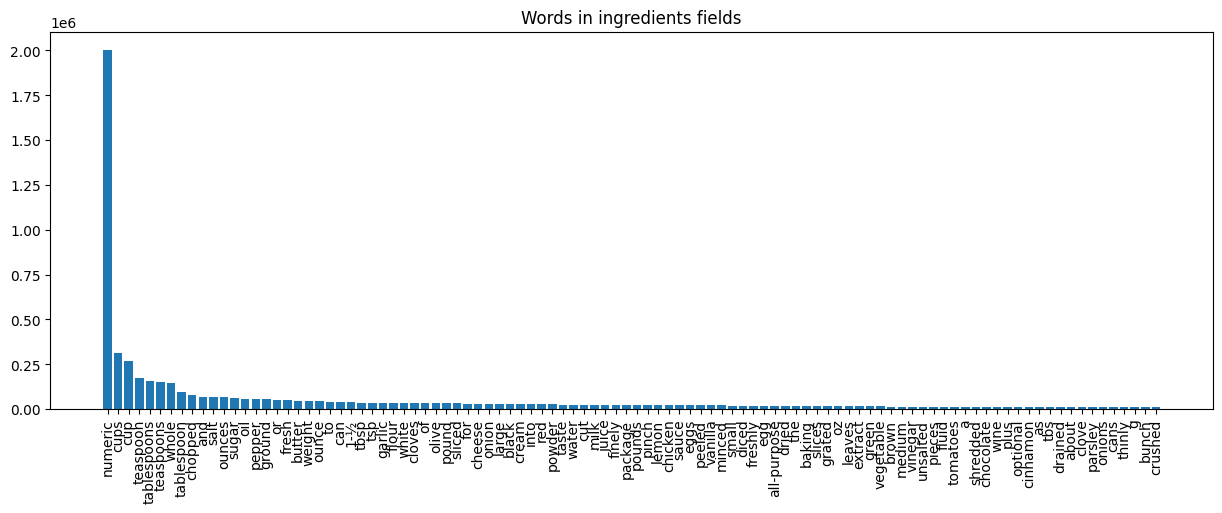

In [13]:
# Plot for ingredients words
# Sort and strip to 100 most used
wordsIngredientsStripped = sorted(wordsIngredients.items(), key=lambda x:x[1], reverse=True)[:101]

wordsIngredientsKeys, wordsIngredientsValues = zip(*wordsIngredientsStripped)
wordsIngredientsKeys = list(wordsIngredientsKeys)
wordsIngredientsValues = list(wordsIngredientsValues)
# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in ingredients fields")
plt.bar(wordsIngredientsKeys[:100], wordsIngredientsValues[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

## Excluding numerical category

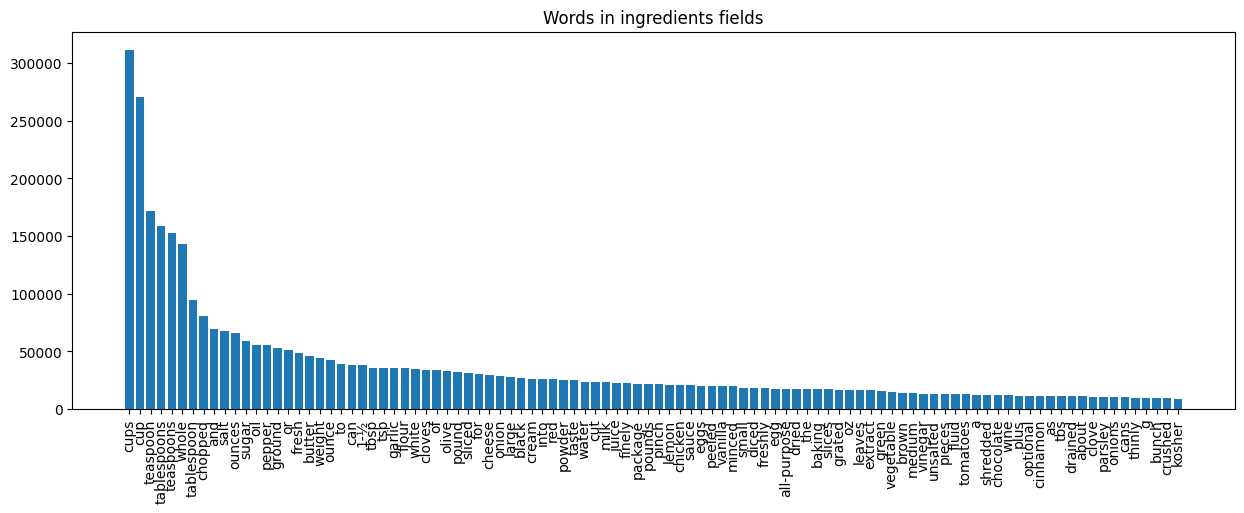

In [14]:
i = wordsIngredientsKeys.index('numeric')
del wordsIngredientsKeys[i]
del wordsIngredientsValues[i]

# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in ingredients fields")
plt.bar(wordsIngredientsKeys, wordsIngredientsValues, align='center')
plt.xticks(rotation='vertical')
plt.show()